<a href="https://colab.research.google.com/github/sonicuu/sharapov_it-32_data_analysis/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A8%D0%B0%D1%80%D0%B0%D0%BF%D0%BE%D0%B2_%D0%98%D0%A2_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [ ]:
import pandas as pd
data_file = 'data.xlsx'
df = pd.read_excel(data_file)

print("Первые строки данных:", df.head())
print("Общая информация о данных:")
df.info()

print("Статистическое описание числовых данных:", df.describe())


Первые строки данных:    Номер заказа     Канал продаж     Продуктовый сегмент  Менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          Название заказа  Продавец            Город  Продажи факт, тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   Продажи план, тыс.руб Дата сделки Дата оплаты Дней между сделкой и оплатой  \
0

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [ ]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Преобразование типов данных
# Столбец "дней_между_сделкой_и_оплатой" приведём к числовому типу, так как это количественные данные
df['дней_между_сделкой_и_оплатой'] = pd.to_numeric(df['дней_между_сделкой_и_оплатой'], errors='coerce')

# Для "дата_оплаты" заполним NaT значением "не оплачено"
df['дата_оплаты'].fillna('не оплачено', inplace=True)

# Причины пропусков: "дата_оплаты" может отсутствовать, если сделка ещё не завершена или клиент не оплатил

# Добавление столбца с суммарными фактическими продажами по всем городам
df['суммарные_продажи_город'] = df.groupby('город')['продажи_факт,_тыс.руб'].transform('sum')

# Проверим преобразованные данные
print("Первые строки данных:", df.head())
print("Общая информация о данных:")
df.info()

print("Статистическое описание числовых данных:", df.describe())


Первые строки данных:    номер_заказа     канал_продаж     продуктовый_сегмент  менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          название_заказа  продавец            город  продажи_факт,_тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   продажи_план,_тыс.руб дата_сделки          дата_оплаты  \
0                    

C:\Users\tavki\AppData\Local\Temp\ipykernel_32120\1834383438.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['дата_оплаты'].fillna('не оплачено', inplace=True)
C:\Users\tavki\AppData\Local\Temp\ipykernel_32120\1834383438.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'не оплачено' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['дата_оплаты'].fillna('не оплачено', inplace=True)


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

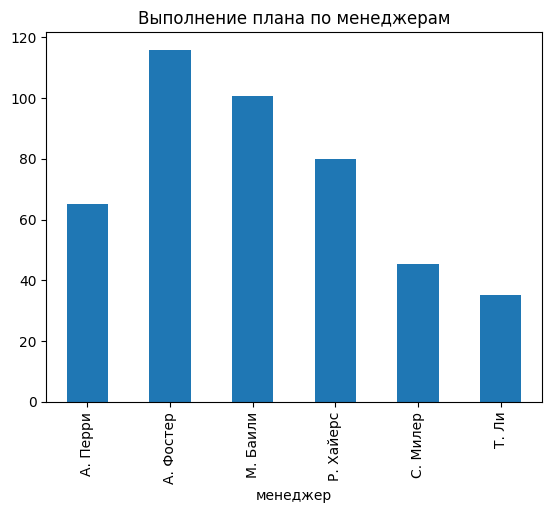

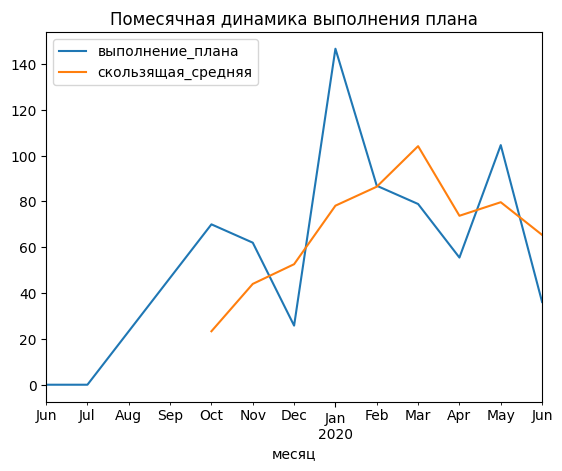

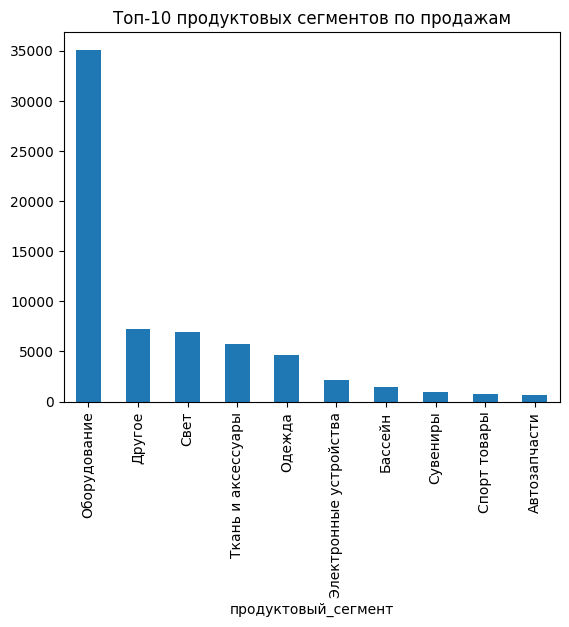

Сегменты с нулевыми продажами: ['Ткань и аксессуары' 'Электронные устройства' 'Игрушки' 'Охота и рыбалка'
 'Одежда' 'Свет' 'Оборудование' 'Другое']


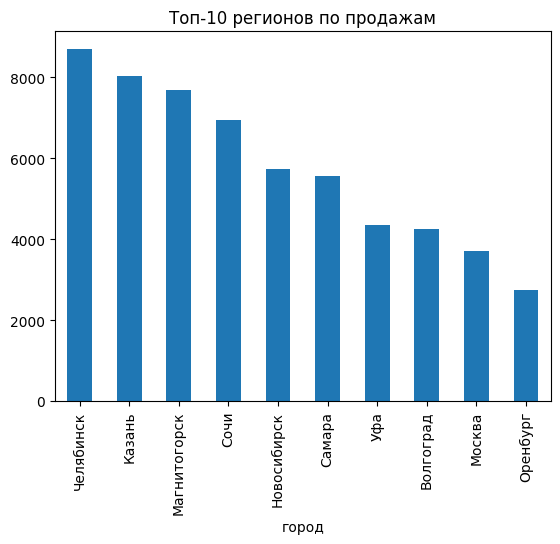

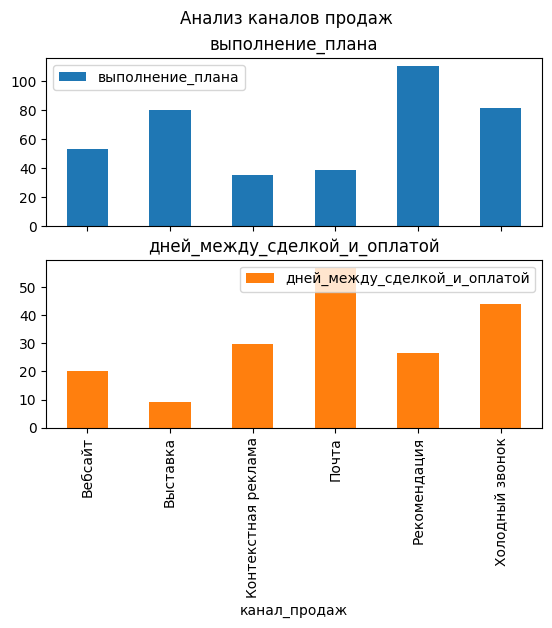

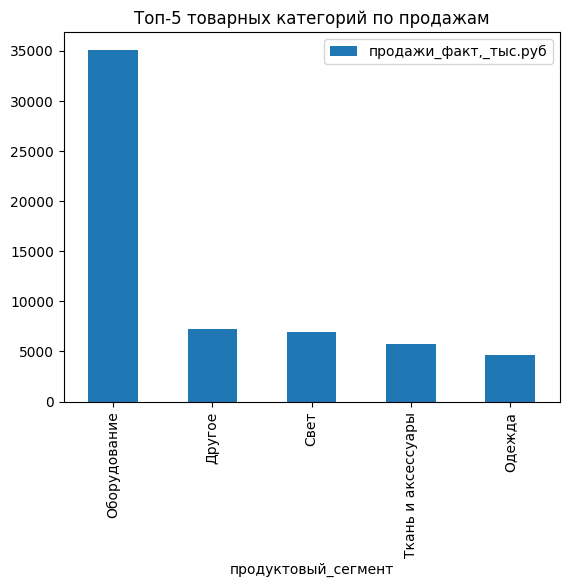

In [ ]:
import matplotlib.pyplot as plt
# 1. Анализ выполнения плана продаж менеджерами
df['выполнение_плана'] = (df['продажи_факт,_тыс.руб'] / df['продажи_план,_тыс.руб']) * 100
manager_sales_performance = df.groupby('менеджер')['выполнение_плана'].mean()
manager_sales_performance.plot(kind='bar', title='Выполнение плана по менеджерам')
plt.show()

# 2. Помесячная динамика выполнения плана
df['месяц'] = df['дата_сделки'].dt.to_period('M')
monthly_sales_performance = df.groupby('месяц').agg({'выполнение_плана': 'mean'})
monthly_sales_performance['скользящая_средняя'] = monthly_sales_performance['выполнение_плана'].rolling(window=3).mean()
monthly_sales_performance.plot(kind='line', title='Помесячная динамика выполнения плана')
plt.show()

# 3. Продажи по продуктовым сегментам
segment_sales = df.groupby('продуктовый_сегмент')['продажи_факт,_тыс.руб'].sum()
top_segments = segment_sales.sort_values(ascending=False).head(10)
top_segments.plot(kind='bar', title='Топ-10 продуктовых сегментов по продажам')
plt.show()

# Сегменты с нулевыми продажами
zero_sales_segments = df[df['продажи_факт,_тыс.руб'] == 0]['продуктовый_сегмент'].unique()
print("Сегменты с нулевыми продажами:", zero_sales_segments)

# 4. География продаж
region_sales = df.groupby('город')['продажи_факт,_тыс.руб'].sum()
top_regions = region_sales.sort_values(ascending=False).head(10)
top_regions.plot(kind='bar', title='Топ-10 регионов по продажам')
plt.show()

# 5. Влияние канала продаж на выполнение плана
channel_sales = df.groupby('канал_продаж').agg({
    'выполнение_плана': 'mean',
    'дней_между_сделкой_и_оплатой': 'mean',
    'продажи_факт,_тыс.руб': 'sum'
})
channel_sales[['выполнение_плана', 'дней_между_сделкой_и_оплатой']].plot(kind='bar', subplots=True, layout=(2, 1), title='Анализ каналов продаж')
plt.show()

# 6. Популярные товарные категории
category_sales = df.groupby('продуктовый_сегмент').agg({
    'продажи_факт,_тыс.руб': 'sum',
    'номер_заказа': 'count'
})
top_categories = category_sales.sort_values(by=['продажи_факт,_тыс.руб'], ascending=False)
top_categories.head().plot(kind='bar', y='продажи_факт,_тыс.руб', title='Топ-5 товарных категорий по продажам')
plt.show()


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

In [ ]:
# Вывод общего вывода
print("1. Профилирование менеджеров:")
print("Рекомендуется профилировать менеджеров по товарным категориям и каналам продаж, чтобы выявить, где они \nдостигают лучших результатов \nи эффективнее выполняют план. Это позволит оптимизировать их работу и повысить продуктивность.\n")

print("2. Расширение доходных каналов и регионов:")
print("Следует расширять успешные каналы продаж, такие как «Рекомендация» и «Холодный звонок», а также \nсосредоточиться на регионах с высоким \nспросом, таких как Челябинск, Казань и Магнитогорск, для увеличения доходов компании.")


1. Профилирование менеджеров:
Рекомендуется профилировать менеджеров по товарным категориям и каналам продаж, чтобы выявить, где они 
достигают лучших результатов 
и эффективнее выполняют план. Это позволит оптимизировать их работу и повысить продуктивность.

2. Расширение доходных каналов и регионов:
Следует расширять успешные каналы продаж, такие как «Рекомендация» и «Холодный звонок», а также 
сосредоточиться на регионах с высоким 
спросом, таких как Челябинск, Казань и Магнитогорск, для увеличения доходов компании.
